In [1]:
# 1. Loading and Preprocessing 

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Dropping the species column (target variable) since this is an unsupervised learning task
print(X.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


C:\Users\keert\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


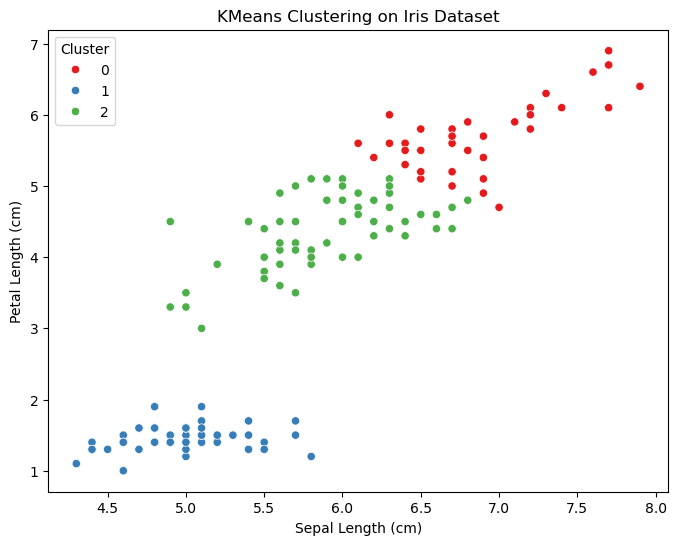

In [3]:
#2. Clustering Algorithm Implementation 
#A) KMeans Clustering 

#It partitions the data into K clusters.

#Assigns each data point to the nearest centroid.

#Updates centroids based on the mean of points within a cluster.

#Repeats until convergence.


# Import KMeans
from sklearn.cluster import KMeans

# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Adding cluster labels to the dataset
X_kmeans = X.copy()
X_kmeans['Cluster'] = kmeans_labels

# Visualizing KMeans clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_kmeans['sepal length (cm)'], y=X_kmeans['petal length (cm)'],
                hue=X_kmeans['Cluster'], palette='Set1')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Cluster")
plt.show()



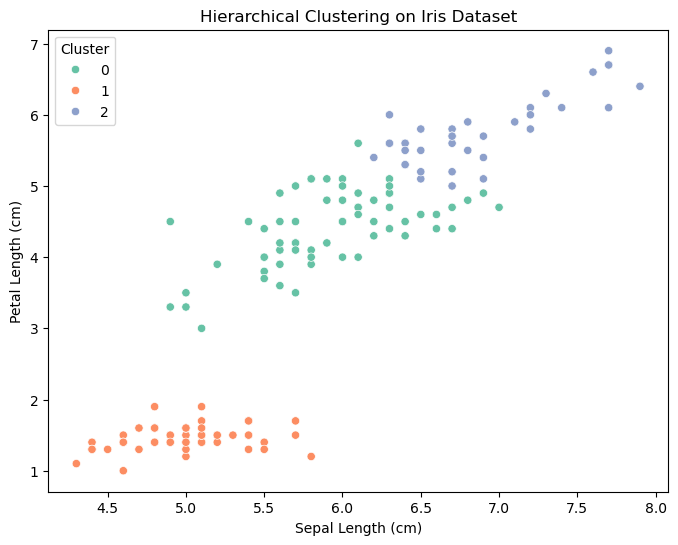

In [5]:
# B) Hierarchical Clustering 

#It builds a tree (dendrogram) of clusters.

#Initially, treats each data point as a single cluster.

#Merges the closest pairs of clusters step-by-step.

#Process continues until all points are merged into a single cluster.


# Import Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Performing Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(X)

# Adding cluster labels
X_hc = X.copy()
X_hc['Cluster'] = hc_labels

# Visualizing Hierarchical Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_hc['sepal length (cm)'], y=X_hc['petal length (cm)'],
                hue=X_hc['Cluster'], palette='Set2')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Cluster")
plt.show()



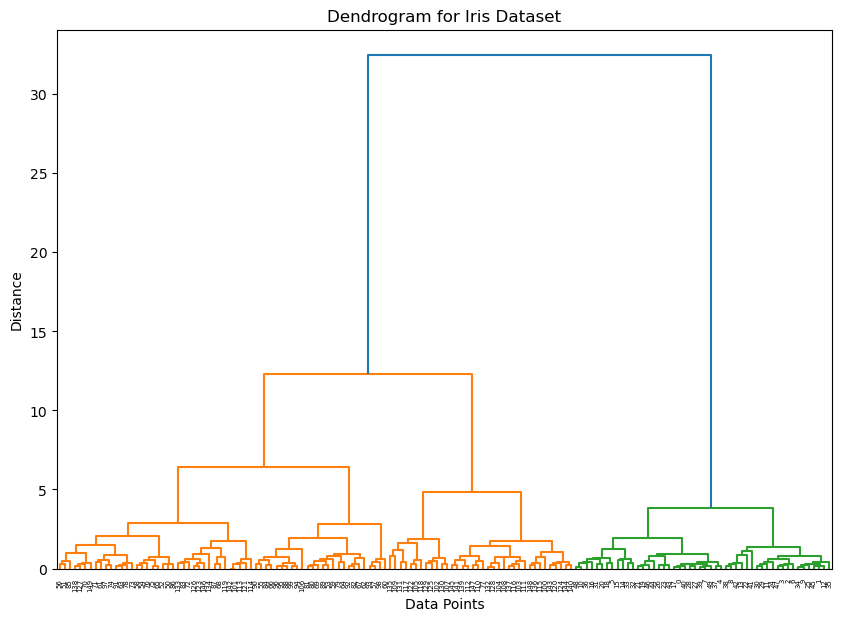

In [7]:
# Plotting the dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Iris Dataset")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
